# HOUSING PRICE PREDICTION

## Table of Content
- Problem Statement
- Exploratory Data Analysis
- Feature engineering
- Modeling
- Conclusion

## Import Libraries

In [63]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, roc_curve

## Problem Statement

Bộ dữ liệu này gồm có 545 dòng và 13 cột với thông tin dữ liệu như sau:
- Price: Giá của căn nhà ($).
- Area: Tổng diện tích của ngôi nhà (square feet - 1 sqft = 0,093 m2).
- Bedrooms: Số phòng ngủ trong ngôi nhà (int).
- Bathrooms: Số phòng tắm trong ngôi nhà (int).
- Stories: Số tầng (int).
- Mainroad: Ngôi nhà có kết nối với tuyến đường chính không (Yes/No).
- Guestroom: Nhà có phòng khách không (Yes/No).
- Basement: Nhà có tầng hầm không (Yes/No).
- Hot water heating: Nhà có hệ thống sưởi ấm nước nóng không (Yes/No).
- Airconditioning: Nhà có hệ thống điều hòa không (Yes/No).
- Parking: Số chỗ đậu xe có sẵn trong nhà (int).
- Prefarea: Khu vực có nằm trong khu vực ưa thích hay không (Yes/No).
- Furnishing status: Tình trạng nội thất trong nhà (Furnished (đầy đủ nội thất), Semi-Furnished (50/50), Unfurnished(không có nội thất)).
><u>Mục tiêu</u>: <br>
> 1. Dự đoán giá nhà với mức độ chính xác tốt nhất. <br> 
> 2. Tìm hiểu các nguyên nhân ảnh hưởng tới giá nhà. 

## Data Understanding and EDA

In [64]:
dataRaw = pd.read_csv('./data/Housing.csv')
dataRaw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [65]:
dataRaw.shape

(545, 13)

Bộ data gồm 545 dòng và 13 cột

In [66]:
dataRaw.isin([np.inf, -np.inf]).any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

Không có giá trị infinity nào

In [67]:
dataRaw.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Không có giá trị NULL

In [68]:
dataRaw.duplicated().sum()

0

**Note:**
- Bộ dữ liệu gồm 543 dòng và 12 cột
- Không có dữ liệu nào là infiniti
- Không có dữ liệu nào rỗng
- Không có dữ liệu bị trùng lặp
- Nhìn chung bộ dữ liệu này khá sạch

### Kiểm tra các thống kê cơ bản của dữ liệu

In [69]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [70]:
dataRaw.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [71]:
# Giảm đơn vị price (ngàn đô)
dataRaw["price"]/=1000

dataRaw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [72]:
import plotly.express as px
px.scatter(dataRaw,x='area',y='price')

Giá trị(price) của các căn nhà theo diện tích (area) 

<Axes: xlabel='price', ylabel='area'>

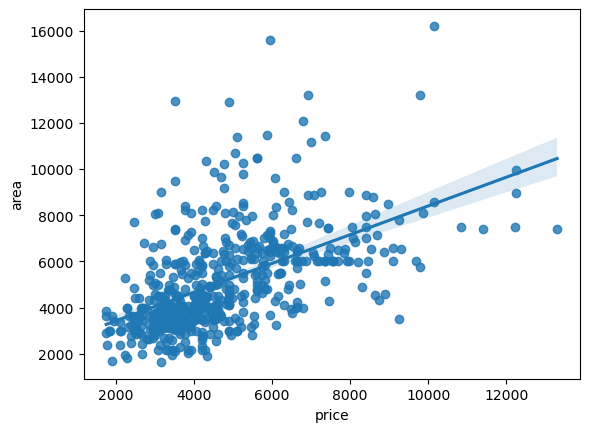

In [73]:
sns.regplot(x="price", y = "area",data=dataRaw,fit_reg=True)

Ta thấy một số giá trị outliers <br>
Thực hiện bỏ các giá trị area > 13000 

In [74]:
dataRaw = dataRaw[(dataRaw["area"]<=13000)]
dataRaw.shape

(541, 13)

Lược bỏ 4 giá trị outliers

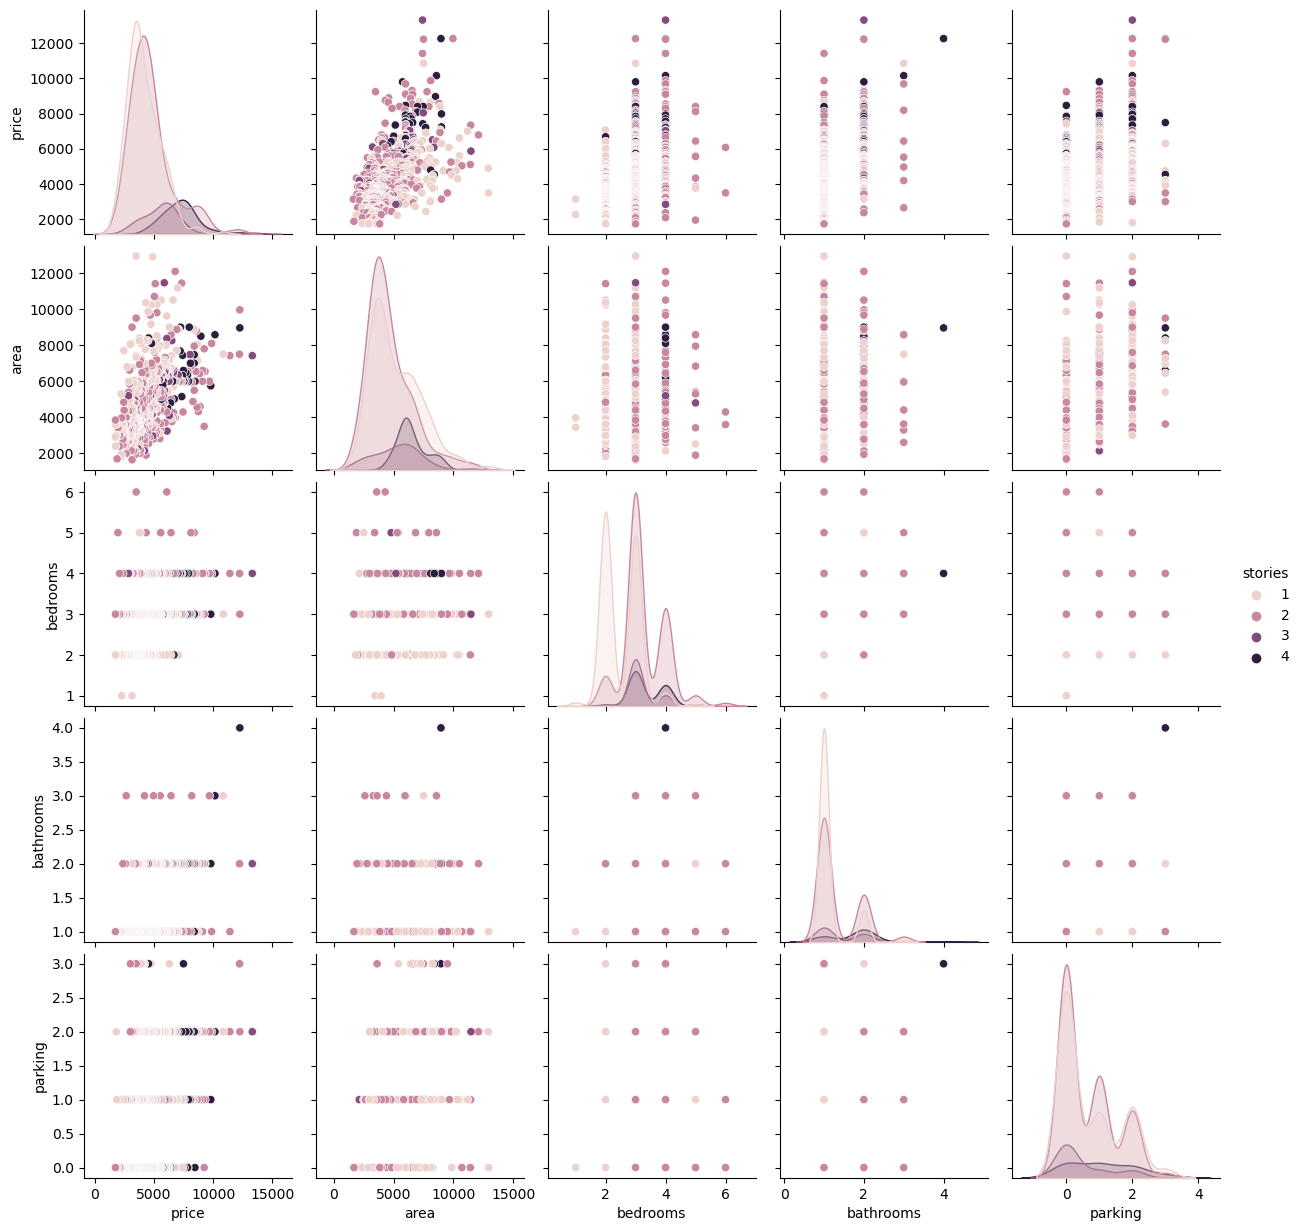

In [75]:
ax = sns.pairplot(dataRaw, hue= "stories")

Nhìn chung bộ data đã sạch hơn 

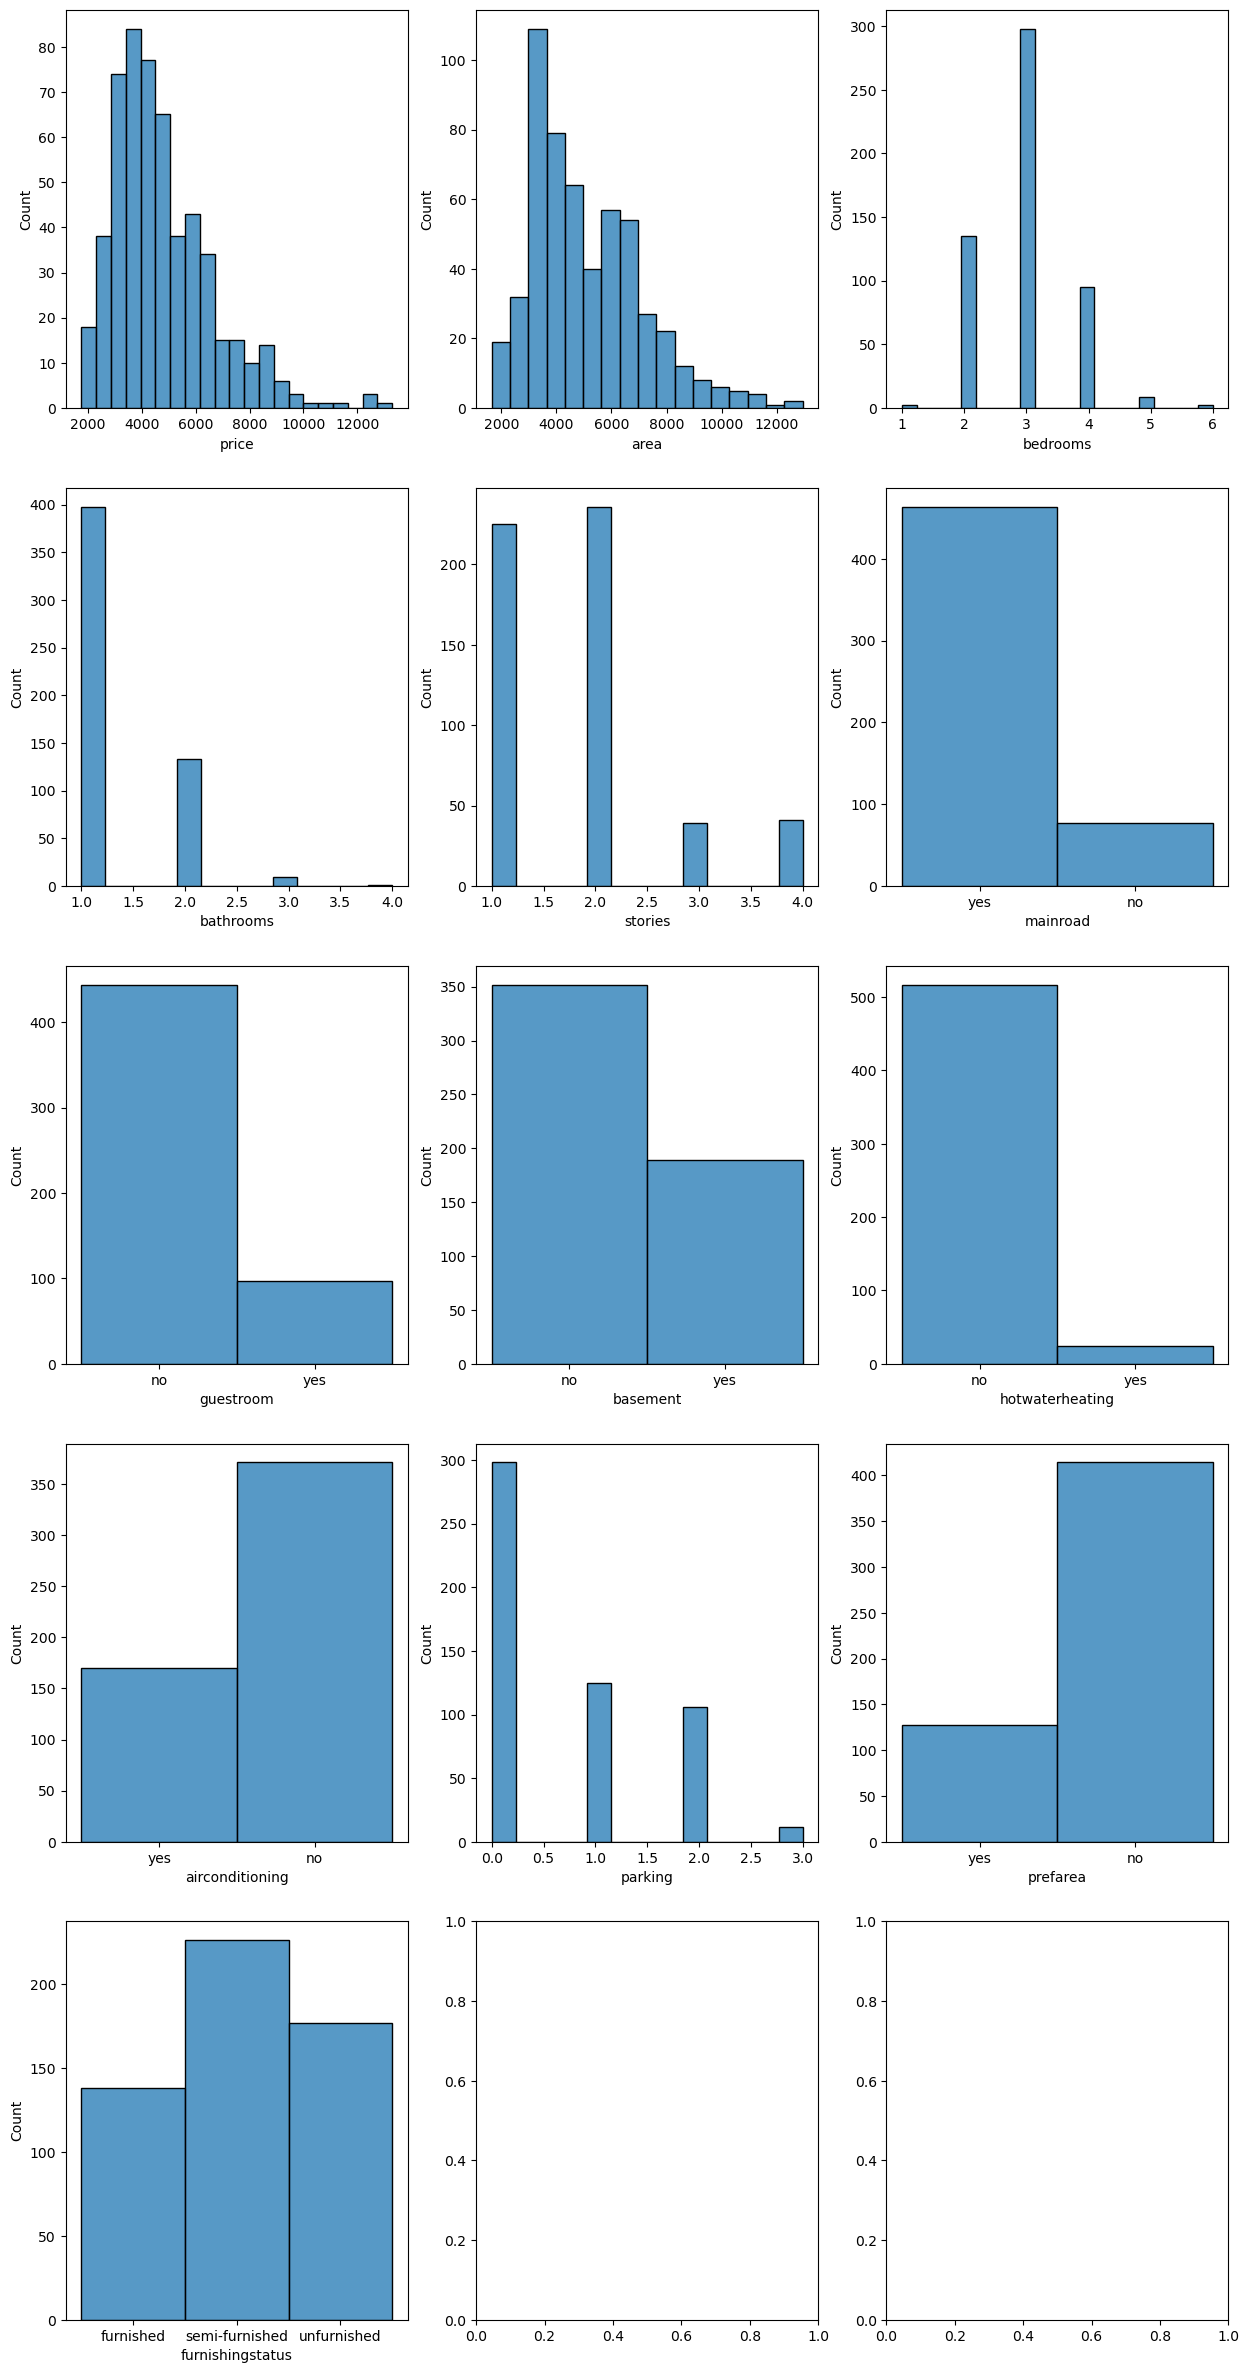

In [76]:

fig, axes = plt.subplots(ncols=3, nrows=5, figsize= (15,30))

for col, ax in zip(dataRaw, axes.flat):
    sns.histplot(dataRaw[col], ax=ax)
plt.show()

**Note**

- Dựa vào các thông tin cơ bản này có thể thấy một vài thông tin sau:
    1. Giá nhà giao động từ 3 ngàn đô đến 6 ngàn đô, diện tích cũng giao động từ 3000 sqft đến 6000 sqft
    2. Hầu hết các căn nhà đều có 3 phòng ngủ, 1 phòng tắm và từ 1-2 tầng.
    3. Đa số các căn nhà được kết nối với đường chính, hệ thống sưởi ẩm nước nóng và một phần nội thất.
    4. Đa số các căn nhà không có phòng khách,không có bãi đỗ xe, tầng hầm và không phải là khu vực ưa thích

### Trực quan giữa giá và các features

In [77]:
cols = ["bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]

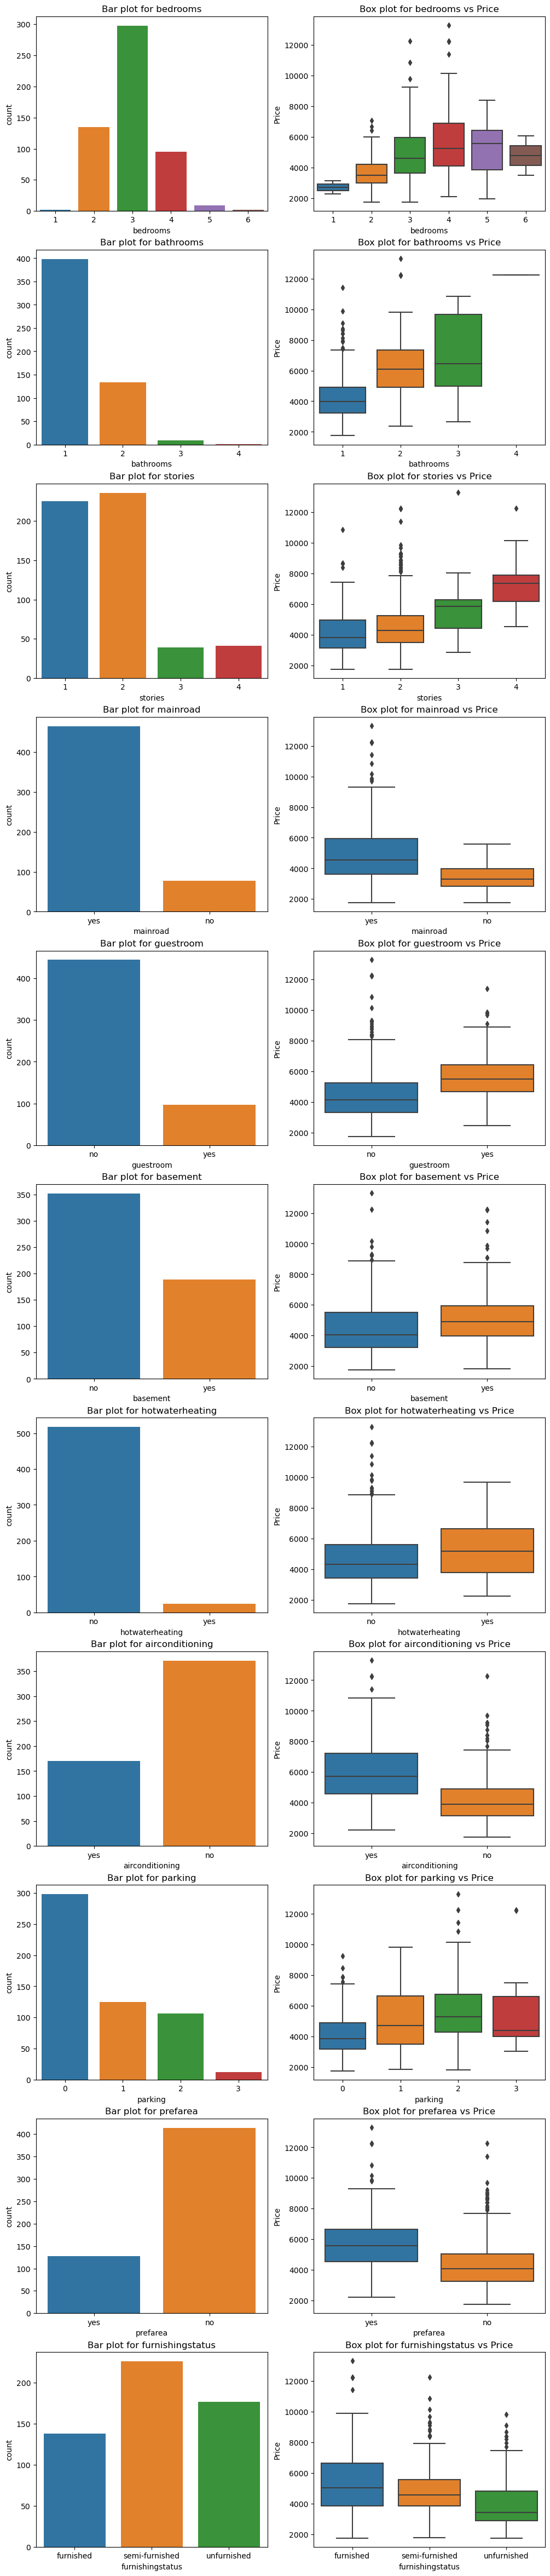

In [78]:
fig, ax = plt.subplots(nrows=11,ncols=2, figsize = (12,60))
for i, col in enumerate(cols):
    sns.countplot(x=col,data=dataRaw,ax=ax[i,0])
    ax[i,0].set_title(f"Bar plot for {col}")
    ax[i,0].set_xlabel(col)

    sns.boxplot(x=col,y="price",data=dataRaw,ax=ax[i,1])
    ax[i,1].set_title(f"Box plot for {col} vs Price")
    ax[i,1].set_xlabel(col)
    ax[i,1].set_ylabel("Price")

**Note**

- Dựa vào thông tin từ các plot trên có một vài nhận định sau:
    1. Giá nhà trung bình cạnh đường chính cao hơn giá nhà không có đường chính.
    2. Giá trung bình của nhà có phòng khách cao hơn nhà không có phòng khách.
    tương tự, những ngôi nhà có tầng hầm, hệ thống sưởi ấm nước nóng, điều hòa, bãi đậu xe có giá trung bình cao hơn.
    3. Giá nhà trung bình ở khu vực ưu thích cao hơn giá nhà ở khu vực không được ưu tiên.
    4. Giá trung bình của nhà có nội thất cao hơn các loại nhà có một phần nội thất và không có nội thất.

## Feature Engineering

### Encoding

In [79]:
# Tạo bản sao data
data = dataRaw.copy()

In [80]:
# Thực hiện Encoder
for i in data.columns:
    if data[i].dtype == "object":
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300.0,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250.0,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250.0,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215.0,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410.0,7420,4,1,2,1,1,1,0,1,2,0,0


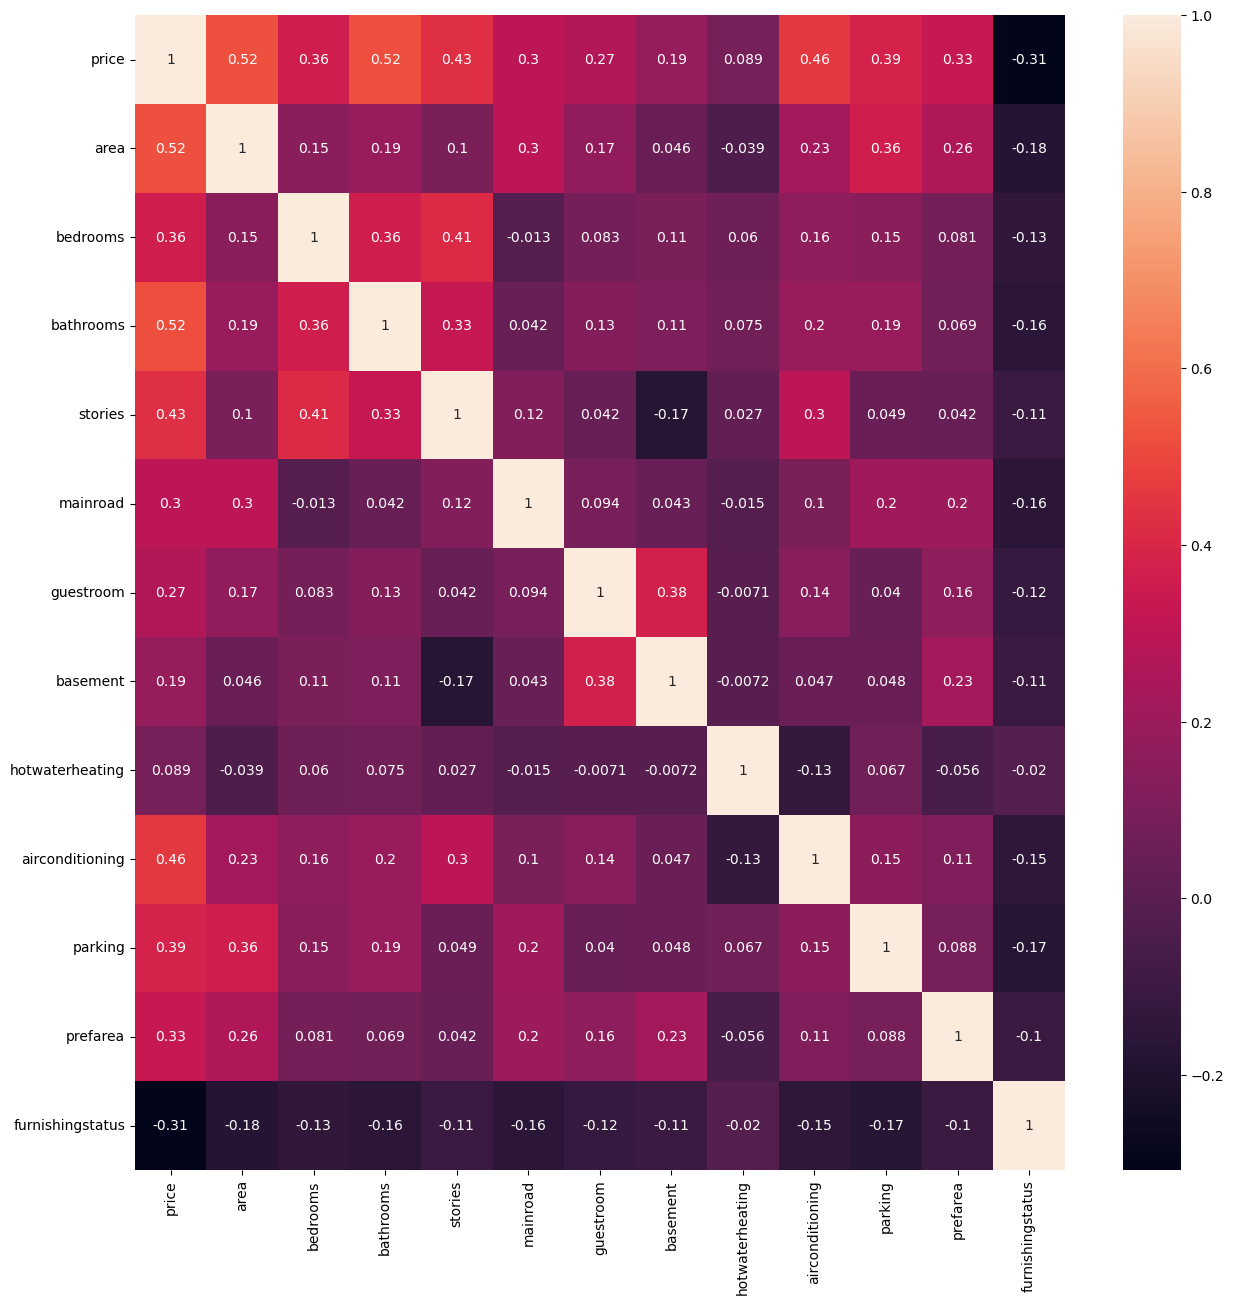

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

Ta thấy mối quan hệ giữa furnishingstatus, hotwaterheating, basement có mối quan hệ thấp với target <br>
Hầu hết các features chưa thấy rõ mối quan hệ với target

## Modeling

In [82]:
# Chia dữ liệu thành dữ liệu train và target
X = data.drop(columns = ['price'])
y = data['price']


In [83]:
# Scale dữ liệu bằng Standar Scaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [84]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 3)

### Linear Regression

In [85]:
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

y_pred1 = l_reg.predict(X_test)
R2 = r2_score(y_test,y_pred1)

print(f"Accuracy: {round(l_reg.score(X_test,y_test)*100,2)} %")
print(f"Mean absolute error: {mean_absolute_error(y_test,y_pred1)}")
print(f"Mean squared error: {mean_squared_error(y_test,y_pred1)}")
print(f"R squared: {R2}")

Accuracy: 70.07 %
Mean absolute error: 689.7021006204338
Mean squared error: 822064.3409563584
R squared: 0.700743673523937


### KNN Regressor

In [86]:
knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(X_train, y_train)

y_pred = knn_regr.predict(X_test)

print(f"Accuracy: {round(knn_regr.score(X_test,y_test)*100,2)} %")
print(f"Mean absolute error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test,y_pred)}")
print(f"R squared: {r2_score(y_test,y_pred)}")

Accuracy: 64.52 %
Mean absolute error: 728.1085
Mean squared error: 974546.6914321764
R squared: 0.6452354781401752


### RandomForest Regressor

In [87]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Accuracy: {round(rf.score(X_test,y_test)*100,2)} %")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

Accuracy: 59.29 %
Mean Squared Error (MSE): 1118344.434571408
Mean Absolute Error (MAE): 789.493681495098
R-squared Score: 0.5928887429474863


### Decision Tree

In [88]:
dt = DecisionTreeRegressor(random_state=0, max_depth=3)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(f"Accuracy: {round(dt.score(X_test,y_test)*100,2)} %")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

Accuracy: 44.65 %
Mean Squared Error (MSE): 1118344.434571408
Mean Absolute Error (MAE): 789.493681495098
R-squared Score: 0.5928887429474863



## Conclusion

- Tổng kết lại, dự án này chỉ ra mối liên hệ giữa các features liên quan đến target (giá nhà), từ đó có thể đưa ra các nhận định về xu hướng giá nhà và dự đoán giá trị ngôi nhà trong việc mua bán. Trong dự án thực hiện 4 model để training, Linear Regression đạt hiểu quả tốt nhất nhưng kết quả đạt được vẫn chưa cao.